In [7]:
import pandas as pd
import numpy as np
import random
from random import shuffle
random.seed(18)
import re
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize
from sklearn.metrics import roc_auc_score
from nltk import word_tokenize,pos_tag
from textblob import TextBlob
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import stem
import csv
from sklearn.metrics import f1_score
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import SGDClassifier
pd.set_option('display.max_colwidth', None)
from sklearn.utils import shuffle
seed = 18

In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [3]:
# from pycorenlp import StanfordCoreNLP
# nlp = StanfordCoreNLP('http://localhost:9000')

import stanza
stanza.download('en') # download English model
nlp = stanza.Pipeline('en') # initialize English neural pipeline

2024-07-17 19:32:16 INFO: Downloaded file to /Users/gbaldonado/stanza_resources/resources.json
2024-07-17 19:32:16 INFO: Downloading default packages for language: en (English) ...
2024-07-17 19:32:17 INFO: File exists: /Users/gbaldonado/stanza_resources/en/default.zip
2024-07-17 19:32:20 INFO: Finished downloading models and saved to /Users/gbaldonado/stanza_resources
2024-07-17 19:32:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-17 19:32:21 INFO: Downloaded file to /Users/gbaldonado/stanza_resources/resources.json
2024-07-17 19:32:22 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-07-17 19:32:22 INFO: Using device: cpu
2024-07-17 19:32:22 INFO: Loading: tokenize
2024-07-17 19:32:22 INFO: Loading: mwt
2024-07-17 19:32:22 INFO: Loading: pos
2024-07-17 19:32:23 INFO: Loading: lemma
2024-07-17 19:32:23 INFO: Loading: constituency
2024-07-17 19:32:23 INFO: Loading: depparse
2024-07-17 19:32:23 INFO: Loading: sentiment
2024-07-17 19:32:23 INFO: Loading: 

In [10]:
merged_aspirational_df = pd.read_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/processed_for_model/merged_themes_using_jaccard_method/merged_Aspirational_sentence_level_batch_1_jaccard.csv", encoding='utf-8')
merged_aspirational_df = shuffle(merged_aspirational_df, random_state=seed)
training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.1, random_state=18, stratify=merged_aspirational_df['label'])
training_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [11]:
training_df.head()

,sentence,label,phrase
0,i am a computer engineering major that wants to get my degree and have to take this class to fulfill my requirements.,1,['I am a computer engineering major that wants to get my degree']
1,i am here to help the environment!,0,['I plan to enter a field of environmental sciences and zoology once I graduate.']
2,i am here to build my future.,0,"['I am here to build my future. I want to have a good future for myself, where I can maintain myself as well as doing what I love to do.']"
3,"and i wouldnt be here without the support of friends and family so in answering the question, why am i here. i have to credit them with some consideration in my answer as well.",0,['Id say Im here to get an education and try to work my way towards being a doctor which is something I aspire to be.']
4,"like understand velocity, acceleration and displacement to determine the motion of an object.",0,['Also I want to be an optometrist and this class is part of that journey.']


In [12]:
pos_labels = len([n for n in training_df['label'] if n==1])
print("Positive labels present in the dataset : {}  out of {} or {}%".format(pos_labels, len(training_df['label']), (pos_labels/len(training_df['label']))*100))

Positive labels present in the dataset : 529  out of 4233 or 12.497047011575715%


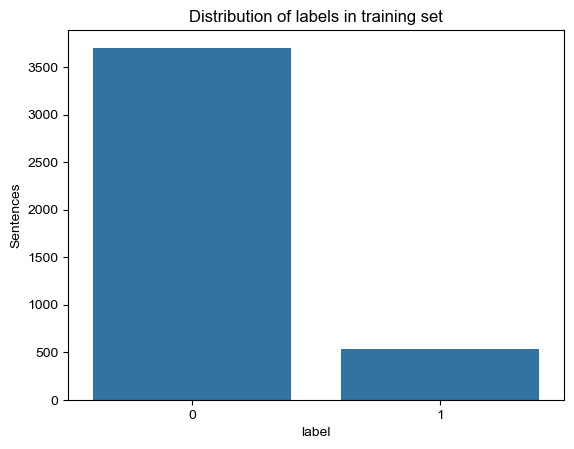

In [13]:
x = training_df['label'].value_counts()
sns.barplot(x)
sns.set(style="whitegrid")
plt.title('Distribution of labels in training set')
plt.gca().set_ylabel('Sentences')
plt.show()

In [14]:
test_df.shape

(471, 3)

In [15]:
test_df.head()

,sentence,label,phrase
0,yes they did encourage and force me to choose my major but i do find interest in it.,0,"['I want to live to my full potential not anyone who has talent and knowledge and not apply it to their life. I want to do that by implementing these qualities to my daily life to become who I want to be. I want to be an Engineering for the future.', 'I dont want to be known as that person who is something in particular. I want to be known as that person who is something and did something about it. I want a title but the authority to be that person.']"
1,thats why i am here.,0,['I want to try to get into veterinary school that is why I am in OCHEM.']
2,it's funny because ive never been happier than i ever been because of everything ive been doing lately.,0,['The only way that Im able to create a better future for my community is by getting a PhD']
3,"my family is very bug on education, so everyone generally aspires to go to college.",0,"['For me personally, I am here to learn more about STEM so I can gain the tools to equip me for medical school']"
4,the implications of the amount of work and dedication that vet school required didnt fully hit me until i was in high school.,0,['I am looking forward to learning and strengthening my knowledge on this subject.']


In [18]:
pos_labels = len([n for n in test_df['label'] if n==1])
print("Positive labels present in the test dataset : {}  out of {} or {}%".format(pos_labels, len(test_df['label']), (pos_labels/len(test_df['label']))*100))

Positive labels present in the test dataset : 59  out of 471 or 12.526539278131635%


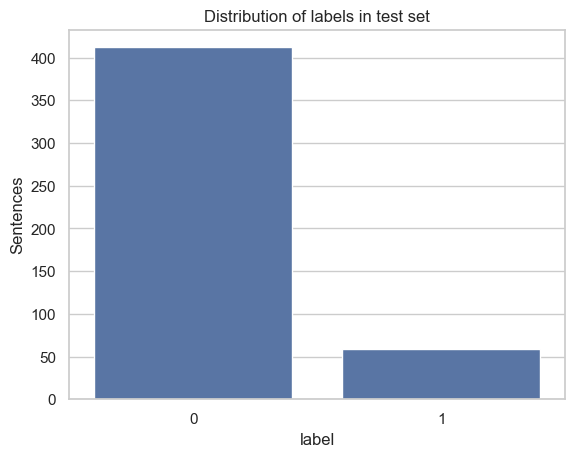

In [19]:
x1 = test_df['label'].value_counts()
sns.barplot(x1)
sns.set(style="whitegrid")
plt.title('Distribution of labels in test set')
plt.gca().set_ylabel('Sentences')
plt.show()

### FEATURE ENGINEERING

**1. NER**

In [20]:
def get_ner(text):
    ner_list = []
    # Annotate the text using stanza
    doc = nlp(text)

    for sentence in doc.sentences:
        for entity in sentence.ents:
            if entity.type == 'PERSON':
                ner_list.append(entity.text)

    return ner_list

# Example usage
text = "Barack Obama was the 44th doctor of the United States."
print(get_ner(text))

['Barack Obama']


In [21]:
# check if a named entity is present in the sentence
def named_entity_present(sentence):
    ner_list = get_ner(sentence)
    if len(ner_list) > 0:
        return 1
    else:
        return 0

**2. Similarity Features**

In [22]:
# A helper function to get the similar words and similarity score
# The function takes tokens of sentence as input and if its not a stop word, get its similarity with synsets of STEM.
stop_words = set(stopwords.words('english'))
stop_words |= set(["help","try", "work", "process", "support", "job"] )
def word_similarity(tokens, syns, field):    
    if field in ['engineering', 'technology']:
        score_threshold = 0.5
    else:
        score_threshold = 0.2
    sim_words = 0
    for token in tokens:
        if token not in stop_words:
            try:
                syns_word = wordnet.synsets(token) 
                score = syns_word[0].path_similarity(syns[0])
                if score >= score_threshold:
                    sim_words += 1
            except: 
                score = 0
    
    return sim_words

In [23]:
# Functions to create columns for similarity based on all STEM fields
syns_bio = wordnet.synsets(lemmatizer.lemmatize("biology"))
syns_maths = wordnet.synsets(lemmatizer.lemmatize("mathematics")) 
syns_tech = wordnet.synsets(lemmatizer.lemmatize("technology"))
syns_eng = wordnet.synsets(lemmatizer.lemmatize("engineering"))
syns_chem = wordnet.synsets(lemmatizer.lemmatize("chemistry"))
syns_phy = wordnet.synsets(lemmatizer.lemmatize("physics"))
syns_sci = wordnet.synsets(lemmatizer.lemmatize("science"))

**3. Medical Word Count**

In [24]:
# Load the medical specialization text file and create a list
medical_list = []
with open('/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/features/medical_specialities.txt', 'r') as medical_fields:
    for line in medical_fields.readlines():
        special_field = line.rstrip('\n')
        special_field = re.sub("\W"," ", special_field )
#         print(special_field)
        medical_list += special_field.split()
medical_list = list(set(medical_list))  
medical_list = [x.lower() for x in medical_list]
print(medical_list)

['palliative', 'hematology', 'gastrointestinal', 'public', 'cardiothoracic', 'hematology', 'blood', 'toxicology', 'hospice', 'surgical', 'plastic', 'anesthesiology', 'cytogenetics', 'consultation', 'cardiac', 'retardation', 'psychiatric', 'segment', 'physical', 'perinatal', 'internal', 'reconstructive', 'care', 'advanced', 'molecular', 'diseases', 'interventional', 'disease', 'infectious', 'mental', 'cytopathology', 'transplant', 'neuropathology', 'failure', 'rehabilitation', 'behavioral', 'endovascular', 'clinical', 'neuromuscular', 'ophthalmology', 'gynecologic', 'neuro', 'forensic', 'endocrinology', 'cornea', 'neurology', 'pulmonary', 'ophthalmology', 'preventive', 'adolescent', 'head', 'urology', 'disabilities', 'addiction', 'oncology', 'chest', 'male', 'geriatric', 'allergy', 'brain', 'injury', 'neonatal', 'abuse', 'abdominal', 'pulmonology', 'immunopathology', 'community', 'transfusion', 'urology', 'breast', 'gastroenterology', 'neurourology', 'sports', 'pelvic', 'gynecology', 'm

In [25]:
# A helper function to get medical words
def check_medical_words(tokens):
    for token in tokens:
        if token not in stop_words and token in [x.lower() for x in medical_list]:
            return 1
        
    return 0

**4. Sentiment Polarity and Subjectivity**

In [26]:
# A helper function to get polarity and subjectivity of the sentence using TexBlob
def get_sentiment(sentence):
    sentiments =TextBlob(sentence).sentiment
    polarity = sentiments.polarity
    subjectivity = sentiments.subjectivity
    return polarity, subjectivity

**5. POS Tag Count**

In [27]:
# A helper function to get the count of POS tags of the sentence
def count_pos_tags(tokens):
    token_pos = pos_tag(tokens)
    count = Counter(tag for word,tag in token_pos)
    interjections =  count['UH']
    nouns = count['NN'] + count['NNS'] + count['NNP'] + count['NNPS']
    adverb = count['RB'] + count['RBS'] + count['RBR']
    verb = count['VB'] + count['VBD'] + count['VBG'] + count['VBN']
    determiner = count['DT']
    pronoun = count['PRP']
    adjetive = count['JJ'] + count['JJR'] + count['JJS']
    preposition = count['IN']
    return interjections, nouns, adverb, verb, determiner, pronoun, adjetive,preposition

In [28]:
def pos_tag_extraction(dataframe, field, func, column_names):
    return pd.concat((
        dataframe,
        dataframe[field].apply(
            lambda cell: pd.Series(func(cell), index=column_names))), axis=1)

**6. Word Embeddings**

In [29]:
# Load the w2v dict from pickle file
with open('/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/features/pickle/embeddings06122024.pickle', 'rb') as w2v_file:
    w2v_dict = pickle.load(w2v_file)

In [30]:
print("length of word embeddings: ", len(w2v_dict.keys()))

length of word embeddings:  4762


In [31]:
# Get the vectors for the essay
def vectorizer(sequence):
    vect = []
    numw = 0
    for w in sequence: 
        try :
            if numw == 0:
                vect = w2v_dict[w]
            else:
                vect = np.add(vect, w2v_dict[w])
            numw += 1
        except Exception as e:
            pass

    return vect/ numw 

In [32]:
# Function to split text into words
def split_into_words(text):
    return text.split()

**7. Unigrams**

In [33]:
# Define the vectorizer
unigram_vect = CountVectorizer(ngram_range=(1, 1), min_df=2, stop_words = 'english')

**WRAPPER**

In [34]:
# Wrapper function for feature engineering
def feature_engineering(original_dataset):

    dataset = original_dataset.copy()
    # create a new column with sentence tokens
    dataset['tokens'] = dataset['sentence'].apply(word_tokenize)
    # 1. Similarity features
    # biology
    dataset['bio_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_bio,'biology',)) 
    # chemistry
    dataset['chem_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_chem,'chemistry',))
    # physics
    dataset['phy_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_phy,'physics',))
    # mathematics
    dataset['math_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_maths,'mathematics',))
    # technology
    dataset['tech_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_tech,'technology',))
    # engineering
    dataset['eng_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_eng,'engineering',))
    
    # medical terms
    dataset['medical_terms'] = dataset['tokens'].apply(check_medical_words)
    
    # polarity and subjectivity
    dataset['polarity'], dataset['subjectivity'] = zip(*dataset['sentence'].apply(get_sentiment))
    
    # named entity recognition
    dataset['ner'] = dataset['sentence'].apply(named_entity_present)
    
    # pos tag count
    dataset = pos_tag_extraction(dataset, 'tokens', count_pos_tags, ['interjections', 'nouns', 'adverb', 'verb', 'determiner', 'pronoun', 'adjetive','preposition'])
    
    # labels
    data_labels = dataset['label']
    # X
    data_x = dataset.drop(columns='label')

    
    # vectorize all the essays
    vect_arr = data_x.tokens.apply(vectorizer)
    for index in range(0, len(vect_arr)):
        i = 0
        for item in vect_arr[index]:
            column_name= "embedding" + str(i)
            data_x.loc[index, column_name] = item
            i +=1
    
    return data_x,data_labels
    

In [58]:
X_train, y_train = feature_engineering(training_df)

In [59]:
X_train.shape

(4233, 121)

In [60]:
y_train = y_train.astype('int')

In [61]:
X_test, y_test = feature_engineering(test_df)

In [62]:
X_test.shape

(471, 121)

In [63]:
y_test = y_test.astype('int')

**Calculate Unigram features for both train and test set**

In [64]:
X_train.shape

(4233, 121)

In [65]:
X_test.shape

(471, 121)

In [66]:
X_train.to_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/notebooks/Aspirational/using_original/saved_feature_engineered_dataset/exp_1/X_train_final.csv", index=False)
X_train.to_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/notebooks/Aspirational/using_original/saved_feature_engineered_dataset/exp_1/X_test_final.csv", index=False)
y_train.to_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/notebooks/Aspirational/using_original/saved_feature_engineered_dataset/exp_1/y_train.csv", index=False)
y_test.to_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/notebooks/Aspirational/using_original/saved_feature_engineered_dataset/exp_1/y_test.csv", index=False)


In [67]:
# Unigrams for training set
unigram_matrix = unigram_vect.fit_transform(X_train['sentence'])
unigrams = pd.DataFrame(unigram_matrix.toarray())
print("Shape of the unigram df for train : ",unigrams.shape)
unigrams = unigrams.reset_index(drop=True)

Shape of the unigram df for train :  (4233, 2308)


In [68]:
X_train_final = pd.concat([X_train, unigrams], axis = 1)

In [69]:
X_train_final.columns = X_train_final.columns.astype(str)

In [70]:
X_train_final.shape

(4233, 2429)

In [71]:
unigram_matrix_test = unigram_vect.transform(X_test['sentence'])
unigrams_test = pd.DataFrame(unigram_matrix_test.toarray())
unigrams_test = unigrams_test.reset_index(drop=True)
print("Test unigram df shape : ",unigrams_test.shape)

Test unigram df shape :  (471, 2308)


In [72]:
X_test_final = pd.concat([X_test, unigrams_test], axis = 1)
X_test_final.shape

(471, 2429)

In [73]:
X_test_final.columns = X_test_final.columns.astype(str)

In [74]:
X_test_final.shape

(471, 2429)

In [75]:
for i in range(0, len(X_train_final.columns)):
    print('{} ---- {}'.format(i, X_train_final.columns[i]))

0 ---- sentence
1 ---- phrase
2 ---- tokens
3 ---- bio_sim_words
4 ---- chem_sim_words
5 ---- phy_sim_words
6 ---- math_sim_words
7 ---- tech_sim_words
8 ---- eng_sim_words
9 ---- medical_terms
10 ---- polarity
11 ---- subjectivity
12 ---- ner
13 ---- interjections
14 ---- nouns
15 ---- adverb
16 ---- verb
17 ---- determiner
18 ---- pronoun
19 ---- adjetive
20 ---- preposition
21 ---- embedding0
22 ---- embedding1
23 ---- embedding2
24 ---- embedding3
25 ---- embedding4
26 ---- embedding5
27 ---- embedding6
28 ---- embedding7
29 ---- embedding8
30 ---- embedding9
31 ---- embedding10
32 ---- embedding11
33 ---- embedding12
34 ---- embedding13
35 ---- embedding14
36 ---- embedding15
37 ---- embedding16
38 ---- embedding17
39 ---- embedding18
40 ---- embedding19
41 ---- embedding20
42 ---- embedding21
43 ---- embedding22
44 ---- embedding23
45 ---- embedding24
46 ---- embedding25
47 ---- embedding26
48 ---- embedding27
49 ---- embedding28
50 ---- embedding29
51 ---- embedding30
52 ---- em

### Model 1: Unigrams, POS Tag Count, Sentiment Polarity, Subjectivity

In [76]:
X_train_final

,sentence,phrase,tokens,bio_sim_words,chem_sim_words,phy_sim_words,math_sim_words,tech_sim_words,eng_sim_words,medical_terms,...,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307
0,i am a computer engineering major that wants to get my degree and have to take this class to fulfill my requirements.,['I am a computer engineering major that wants to get my degree'],"[i, am, a, computer, engineering, major, that, wants, to, get, my, degree, and, have, to, take, this, class, to, fulfill, my, requirements, .]",0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,i am here to help the environment!,['I plan to enter a field of environmental sciences and zoology once I graduate.'],"[i, am, here, to, help, the, environment, !]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,i am here to build my future.,"['I am here to build my future. I want to have a good future for myself, where I can maintain myself as well as doing what I love to do.']","[i, am, here, to, build, my, future, .]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"and i wouldnt be here without the support of friends and family so in answering the question, why am i here. i have to credit them with some consideration in my answer as well.",['Id say Im here to get an education and try to work my way towards being a doctor which is something I aspire to be.'],"[and, i, wouldnt, be, here, without, the, support, of, friends, and, family, so, in, answering, the, question, ,, why, am, i, here, ., i, have, to, credit, them, with, some, consideration, in, my, answer, as, well, .]",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"like understand velocity, acceleration and displacement to determine the motion of an object.",['Also I want to be an optometrist and this class is part of that journey.'],"[like, understand, velocity, ,, acceleration, and, displacement, to, determine, the, motion, of, an, object, .]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,"this semester i am taking physiology and lab, bio 230 and lab, physics and lab, yoga, and political science.","['I am majoring in preKinesiology and taking classes that I need to get into graduate school, hopefully the Physical Therapy Program at California State University of Long Beach']","[this, semester, i, am, taking, physiology, and, lab, ,, bio, 230, and, lab, ,, physics, and, lab, ,, yoga, ,, and, political, science, .]",3,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,i do not want to lie and say that this is not also my goal.,['All of this has lead me to pursue a degree in Mechanical Engineering'],"[i, do, not, want, to, lie, and, say, that, this, is, not, also, my, goal, .]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4230,i want to be able to help my family out with paying bills and stuff.,"['I want to get a job in the film industry. Im not really sure what part of it though. I was thinking a director, editor, or producer.']","[i, want, to, be, able, to, help, my, family, out, with, paying, bills, and, stuff, .]",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4231,my job here is to move forward.,"[""I am here for the purpose of furthering my career. I hold myself accountable and know that I'm here to grow. My job here is to move forward.""]","[my, job, here, is, to, move, forward, .]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X_train_model_1 = X_train_final.iloc[:,np.r_[10:12,13:21,121:2429]]

In [79]:
X_train_model_1.shape

(4233, 2318)

In [80]:
X_train_model_1.head(2)

,polarity,subjectivity,interjections,nouns,adverb,verb,determiner,pronoun,adjetive,preposition,...,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307
0,0.13125,0.3,0,6,0,3,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.00000,0.0,0,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_test_model_1 = X_test_final.iloc[:,np.r_[10:12,13:21,121:2429]]

In [82]:
X_test_model_1.shape

(471, 2318)

In [83]:
model_1_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_1_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_1,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_1), digits=4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.408
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9460    0.8083    0.8717       412
           1     0.3361    0.6780    0.4494        59

    accuracy                         0.7919       471
   macro avg     0.6411    0.7431    0.6606       471
weighted avg     0.8696    0.7919    0.8188       471



In [85]:
lr_model_1 = LogisticRegression(random_state=18, 
                                solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], 
                                class_weight='balanced').fit(X_train_model_1, y_train)
y_lr = lr_model_1.predict(X_test_model_1)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 333, False Positive: 79, False Negative: 19, True Positive: 40
--------------------------------------------------------------------------------
[[333  79]
 [ 19  40]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       412
           1       0.34      0.68      0.45        59

    accuracy                           0.79       471
   macro avg       0.64      0.74      0.66       471
weighted avg       0.87      0.79      0.82       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.93 | 0.85 | 0.89 | 117 |
| Class 1 |0.51 | 0.72 | 0.60 | 25 |
| Macro Average Score | 0.72 | 0.79 | 0.75 | 142|

### Model 2: All Features

In [86]:
# X_train_model_2 = X_train_final.iloc[:,np.r_[3:1113]]
X_train_model_2 = X_train_final.iloc[:, np.r_[3:2429]]

In [87]:
X_train_model_2

,bio_sim_words,chem_sim_words,phy_sim_words,math_sim_words,tech_sim_words,eng_sim_words,medical_terms,polarity,subjectivity,ner,...,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307
0,0,0,0,0,1,1,0,0.131250,0.300000,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0.000000,0.125000,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,3,3,0,2,0,0,0,0.000000,0.100000,0,...,0,0,0,0,0,0,0,0,0,0
4229,0,0,0,0,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4230,0,0,0,0,0,0,1,0.500000,0.625000,0,...,0,0,0,0,0,0,0,0,0,0
4231,0,0,0,0,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_train_model_2.shape

(4233, 2426)

In [89]:
X_test_model_2 = X_test_final.iloc[:,np.r_[3:2429]]

In [90]:
X_test_model_2.shape

(471, 2426)

In [91]:
# from sklearn.preprocessing import StandardScaler
# # Updated pipeline with scaling
# model_2_pipeline = Pipeline([
#     # ('scaler', StandardScaler()),  # Feature scaling
#     ('clf', LogisticRegression(class_weight='balanced', random_state=18)),
# ])

# # Expanded parameter grid
# parameters = {
#     'clf__C': [0.0001, 0.001, 0.009, 0.01, 0.1, 1, 5, 10],
#     'clf__penalty': ["l2", "elasticnet"],  # Consider adding "elasticnet" if you decide to use it
#     'clf__solver': ['liblinear'],  # Include saga for larger datasets
# }

# # Using GridSearchCV with additional scoring
# grid_search = GridSearchCV(model_2_pipeline, parameters, scoring="f1", cv=10, n_jobs=-1, verbose=1)

# # Fitting the model
# grid_search.fit(X_train_model_2, y_train)

# # Best score and parameters
# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()

# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

# # Classification report on test set
# print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_2), digits=4))

model_2_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2", "elasticnet"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_2_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_2,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_2), digits=4))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best score: 0.418
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9529    0.7864    0.8617       412
           1     0.3282    0.7288    0.4526        59

    accuracy                         0.7792       471
   macro avg     0.6406    0.7576    0.6572       471
weighted avg     0.8747    0.7792    0.8105       471



In [92]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
# Fit the logistic regression model
lr_model_2 = LogisticRegression(random_state=18, 
                                 solver=best_parameters['clf__solver'], 
                                 C=best_parameters['clf__C'], 
                                 penalty=best_parameters['clf__penalty'], 
                                 class_weight='balanced').fit(X_train_model_2, y_train)

# Get predicted probabilities for the positive class
y_proba = lr_model_2.predict_proba(X_test_model_2)[:, 1]

# Set an initial threshold (0.5 is common, but can be adjusted)
threshold = 0.5
y_lr_adjusted = (y_proba >= threshold).astype(int)

# Compute confusion matrix and classification report
tn, fp, fn, tp = confusion_matrix(y_test, y_lr_adjusted).ravel()
print('Logistic Regression Classifier')
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr_adjusted))
print('-' * 80)
print(classification_report(y_test, y_lr_adjusted))

# Evaluate different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_lr_temp = (y_proba >= threshold).astype(int)
    temp_precision = precision_score(y_test, y_lr_temp)
    temp_recall = recall_score(y_test, y_lr_temp)
    print(f"Threshold: {threshold:.1f}, Precision: {temp_precision:.4f}, Recall: {temp_recall:.4f}")

Logistic Regression Classifier
True Negative: 324, False Positive: 88, False Negative: 16, True Positive: 43
--------------------------------------------------------------------------------
[[324  88]
 [ 16  43]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.73      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.76      0.66       471
weighted avg       0.87      0.78      0.81       471

Threshold: 0.1, Precision: 0.1336, Recall: 0.9831
Threshold: 0.2, Precision: 0.1830, Recall: 0.9831
Threshold: 0.3, Precision: 0.2477, Recall: 0.9153
Threshold: 0.4, Precision: 0.3000, Recall: 0.8644
Threshold: 0.5, Precision: 0.3282, Recall: 0.7288
Threshold: 0.6, Precision: 0.3864, Recall: 0.5763
Threshold: 0.7, Precision: 0.4200, Recall: 0.3559
Threshold: 0.8, Precision: 0.

In [93]:
lr_model_2 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_2, y_train)
y_lr = lr_model_2.predict(X_test_model_2)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 324, False Positive: 88, False Negative: 16, True Positive: 43
--------------------------------------------------------------------------------
[[324  88]
 [ 16  43]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.73      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.76      0.66       471
weighted avg       0.87      0.78      0.81       471



In [94]:
NameOfVariables = X_train_model_2.columns.values
Var_coef = zip(lr_model_2.coef_[0,:],NameOfVariables)
sorted_coef_val = sorted(Var_coef)
for item in sorted_coef_val:
    print(item[1],'--- Value:',item[0])

embedding87 --- Value: -0.8882756809390457
1004 --- Value: -0.7055558846425228
227 --- Value: -0.6612883133195323
572 --- Value: -0.6167292124812569
1754 --- Value: -0.6077514681022216
embedding94 --- Value: -0.5953638404952423
embedding83 --- Value: -0.5540867623900042
1003 --- Value: -0.5070878136745426
1462 --- Value: -0.4772210788757899
689 --- Value: -0.4682350984005633
embedding61 --- Value: -0.4298803528104255
986 --- Value: -0.41829926064724066
2120 --- Value: -0.40120620527665435
embedding88 --- Value: -0.3927590640883635
1501 --- Value: -0.3757426213785341
1610 --- Value: -0.37332951803951947
embedding44 --- Value: -0.37252443287851655
876 --- Value: -0.3650785959958974
791 --- Value: -0.3566329001244845
640 --- Value: -0.351315913855378
embedding90 --- Value: -0.3463266364875982
1234 --- Value: -0.3456248983012937
1955 --- Value: -0.3409582295503252
1679 --- Value: -0.3372330087334393
2080 --- Value: -0.3336764787749299
1233 --- Value: -0.3293516103603002
1702 --- Value: -0.

| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.97 | 0.88 | 0.92 | 117 |
| Class 1 |0.61 | 0.88 | 0.72 | 25 |
| Macro Average Score | 0.79 | 0.88 | 0.82 | 142|

### Model 3: Without Unigrams

In [95]:
X_train_model_3 = X_train_final.iloc[:,np.r_[3:121]]

In [96]:
X_train_model_3.shape

(4233, 118)

In [97]:
X_test_model_3 = X_test_final.iloc[:,np.r_[3:121]]

In [98]:
X_test_model_3.shape

(471, 118)

In [99]:
model_3_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.0001, 0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2", "elasticnet"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_3_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_3,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_3), digits=4))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.388
Best parameters set:
	clf__C: 5
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9503    0.6966    0.8039       412
           1     0.2604    0.7458    0.3860        59

    accuracy                         0.7028       471
   macro avg     0.6053    0.7212    0.5949       471
weighted avg     0.8639    0.7028    0.7516       471



In [100]:
lr_model_3 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_3, y_train)
y_lr = lr_model_3.predict(X_test_model_3)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 287, False Positive: 125, False Negative: 15, True Positive: 44
--------------------------------------------------------------------------------
[[287 125]
 [ 15  44]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       412
           1       0.26      0.75      0.39        59

    accuracy                           0.70       471
   macro avg       0.61      0.72      0.59       471
weighted avg       0.86      0.70      0.75       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.99 | 0.82 | 0.90 | 117 |
| Class 1 |0.53 | 0.96 | 0.69 | 25 |
| Macro Average Score | 0.76 | 0.89 | 0.79 | 142|

### Model 4: Without Embeddings

In [101]:
X_train_model_4 = X_train_final.iloc[:,np.r_[3:21,121:2429]]

In [102]:
X_train_model_4.shape

(4233, 2326)

In [103]:
X_test_model_4 = X_test_final.iloc[:,np.r_[3:21,121:2429]]

In [104]:
X_test_model_4.shape

(471, 2326)

In [105]:
model_4_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
              'clf__C': [0.0001, 0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2", "elasticnet"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_4_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_4,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_4), digits=4))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.401
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9460    0.8083    0.8717       412
           1     0.3361    0.6780    0.4494        59

    accuracy                         0.7919       471
   macro avg     0.6411    0.7431    0.6606       471
weighted avg     0.8696    0.7919    0.8188       471



In [106]:
lr_model_4 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_4, y_train)
y_lr = lr_model_4.predict(X_test_model_4)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 333, False Positive: 79, False Negative: 19, True Positive: 40
--------------------------------------------------------------------------------
[[333  79]
 [ 19  40]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       412
           1       0.34      0.68      0.45        59

    accuracy                           0.79       471
   macro avg       0.64      0.74      0.66       471
weighted avg       0.87      0.79      0.82       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.94 | 0.89 | 0.91 | 117 |
| Class 1 |0.58 | 0.72 | 0.64 | 25 |
| Macro Average Score | 0.76 | 0.80 | 0.78 | 142|

### Model 5: Without POS Tag Count

In [107]:
X_train_model_5 = X_train_final.iloc[:,np.r_[3:13,21:2429]]

In [108]:
X_train_model_5.shape

(4233, 2418)

In [109]:
X_test_model_5 = X_test_final.iloc[:,np.r_[3:13,21:2429]]

In [110]:
X_test_model_5.shape

(471, 2418)

In [111]:
model_5_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_5_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_5,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_5), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.415
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.71      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.75      0.66       471
weighted avg       0.87      0.78      0.81       471



In [112]:
lr_model_5 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_5, y_train)
y_lr = lr_model_5.predict(X_test_model_5)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 326, False Positive: 86, False Negative: 17, True Positive: 42
--------------------------------------------------------------------------------
[[326  86]
 [ 17  42]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.71      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.75      0.66       471
weighted avg       0.87      0.78      0.81       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.96 | 0.86 | 0.91 | 117 |
| Class 1 |0.57 | 0.84 | 0.68 | 25 |
| Macro Average Score | 0.76 | 0.85 | 0.79 | 142|

In [113]:
NameOfVariables = X_train_model_5.columns.values
Var_coef = zip(lr_model_5.coef_[0,:],NameOfVariables)
sorted_coef_val = sorted(Var_coef)
for item in sorted_coef_val:
    print(item[1],'--- Value:',item[0])

embedding87 --- Value: -0.871243223870359
1004 --- Value: -0.681014810635363
227 --- Value: -0.6389343169977558
1754 --- Value: -0.6258207171195848
embedding94 --- Value: -0.620224595527208
572 --- Value: -0.5588837178218948
embedding83 --- Value: -0.5472428805411529
1003 --- Value: -0.5289707414192003
689 --- Value: -0.45470801634828445
1462 --- Value: -0.4345432798551123
embedding61 --- Value: -0.3934456252623581
2120 --- Value: -0.38890124500126844
986 --- Value: -0.38297293821970974
1610 --- Value: -0.3817036170885432
1501 --- Value: -0.3798126057760435
embedding44 --- Value: -0.3745417986718786
embedding88 --- Value: -0.36584824359097445
embedding90 --- Value: -0.36256323207398666
876 --- Value: -0.3600922414918091
791 --- Value: -0.35401632212783013
embedding0 --- Value: -0.35353563481868483
640 --- Value: -0.34530500646924306
1234 --- Value: -0.33544473522903007
1702 --- Value: -0.3335334194693714
1233 --- Value: -0.32325802329968184
1955 --- Value: -0.32221811056903193
1679 ---

### Model 6: Without STEM Similarity

In [115]:
X_train_model_6 = X_train_final.iloc[:,np.r_[10:2429]]

In [116]:
X_train_model_6.shape

(4233, 2419)

In [117]:
X_test_model_6 = X_test_final.iloc[:,np.r_[10:2429]]

In [118]:
X_test_model_6.shape

(471, 2419)

In [119]:
model_6_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_6_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_6,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_6), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.425
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       412
           1       0.34      0.75      0.47        59

    accuracy                           0.79       471
   macro avg       0.65      0.77      0.67       471
weighted avg       0.88      0.79      0.82       471



In [120]:
lr_model_6 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_6, y_train)
y_lr = lr_model_6.predict(X_test_model_6)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 326, False Positive: 86, False Negative: 15, True Positive: 44
--------------------------------------------------------------------------------
[[326  86]
 [ 15  44]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       412
           1       0.34      0.75      0.47        59

    accuracy                           0.79       471
   macro avg       0.65      0.77      0.67       471
weighted avg       0.88      0.79      0.82       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.97 | 0.87 | 0.92 | 117 |
| Class 1 |0.59 | 0.88 | 0.71 | 25 |
| Macro Average Score | 0.78 | 0.88 | 0.81 | 142|

### Model 7: Without Sentiment Features

In [121]:
X_train_model_7 = X_train_final.iloc[:,np.r_[3:10,12:2429]]

In [122]:
X_train_model_7.shape

(4233, 2424)

In [123]:
X_test_model_7 = X_test_final.iloc[:,np.r_[3:10,12:2429]]

In [124]:
X_test_model_7.shape

(471, 2424)

In [125]:
model_7_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_7_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_7,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_7), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.420
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.71      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.75      0.66       471
weighted avg       0.87      0.78      0.81       471



In [126]:
lr_model_7 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_7, y_train)
y_lr = lr_model_7.predict(X_test_model_7)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 326, False Positive: 86, False Negative: 17, True Positive: 42
--------------------------------------------------------------------------------
[[326  86]
 [ 17  42]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.71      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.75      0.66       471
weighted avg       0.87      0.78      0.81       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.94 | 0.88 | 0.91 | 117 |
| Class 1 |0.58 | 0.76 | 0.66 | 25 |
| Macro Average Score | 0.76 | 0.82 | 0.78 | 142|

### Model 8: Without NER

In [127]:
X_train_model_8 = X_train_final.iloc[:,np.r_[3:12,13:2429]]

In [128]:
X_train_model_8.shape

(4233, 2425)

In [129]:
X_test_model_8 = X_test_final.iloc[:,np.r_[3:12,13:2429]]

In [130]:
X_test_model_8.shape

(471, 2425)

In [131]:
model_8_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_8_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_8,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_8), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.418
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.73      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.76      0.66       471
weighted avg       0.87      0.78      0.81       471



In [132]:
lr_model_8 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_8, y_train)
y_lr = lr_model_8.predict(X_test_model_8)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 324, False Positive: 88, False Negative: 16, True Positive: 43
--------------------------------------------------------------------------------
[[324  88]
 [ 16  43]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.33      0.73      0.45        59

    accuracy                           0.78       471
   macro avg       0.64      0.76      0.66       471
weighted avg       0.87      0.78      0.81       471



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.96 | 0.86 | 0.91 | 117 |
| Class 1 |0.57 | 0.84 | 0.68 | 25 |
| Macro Average Score | 0.76 | 0.85 | 0.79 | 142|

### Final Summary

| S.No|Features| Precision | Recall | F1 |
| :-:| :-- | :-: |:-: | :-: |
| 1 |Embeddings + POS Tag Count + Sentiment (Polarity and Subjectivity) + STEM Similarity + NER| 0.76 | 0.89 | 0.79 |
| 2 |Unigrams + POS Tag Count + Sentiment (Polarity and Subjectivity) + STEM Similarity + NER  |0.76 | 0.80 | 0.78 |
| 3 |Embeddings + Unigrams + Sentiment (Polarity and Subjectivity) + STEM Similarity + NER | 0.76 | 0.85 | 0.79 |
| 4 |**Embeddings + Unigrams + Sentiment (Polarity and Subjectivity) + NER + POS Tag Count** | **0.78** | **0.88** | **0.81**|
| 5 |Embeddings + Unigrams + STEM Similarity + NER + POS Tag Count | 0.76 | 0.82 | 0.78|
| 6 |Embeddings + Unigrams + STEM Similarity + POS Tag Count + Sentiment (Polarity and Subjectivity) | 0.76 | 0.85 | 0.79|